In [1]:
#%matplotlib widget
# jeśli wykresy nie będą działać - usuń (zakomentuj) powyższą linijkę i zrestartuj kernel notebooka

import numpy as np
import matplotlib.pyplot as plt

---

Użyj odpowiednich funkcji pakietu NumPy aby zdefiniować 
- macierz 3x3 o zadanych wartościach (dowolnych)
- macierz jednostkową o wymiarze 3x3

1. Oblicz "ręcznie" wyznaczniki wygenerowanych macierzy
2. Porównaj uzyskane wyniki z funkcją ```np.linalg.det```


In [2]:
A = np.matrix(
    [
        [ 1,2,3 ],
        [ 4,5,6 ],
        [ 7,8,9 ]
    ]
)
detA=A[0,0]*A[1,1]*A[2,2] + A[0,1]*A[1,2]*A[2,0] + A[0,2]*A[1,0]*A[2,1] - A[2,0]*A[1,1]*A[0,2] - A[2,1]*A[1,2]*A[0,0] - A[2,2]*A[1,0]*A[0,1]
print(detA)


x=np.linalg.det(A)
print(x)


0
-9.51619735392994e-16


---

Dany jest układ równań o postaci

$$
\left\{ \begin{array}{ll}
2x - y = -1\\
3x +y =16
\end{array} \right.
$$

          
Rozwiąż ten układ równań metodą wyznaczników.

In [3]:
W =np.matrix(
     [
         [2,-1],
         [3,1]
     ]  
 )
Wx= np.matrix(
     [[-1,-1],
      [16,1]
     ]  
 )
Wy = np.matrix(
     [[2,-1],
      [3,16]
     ]  
 )


# policzyć wyznaczniki np. za pomocą funkcji np.linalg.det
wW =round( np.linalg.det(W))
wWx =round (np.linalg.det(Wx))
wWy =round (np.linalg.det(Wy))
print (wW, wWx, wWy)

# sprawdzić przypadki szczególne

# podać rozwiązanie
x= wWx / wW
y= wWy / wW

print(x,y)

5 15 35
3.0 7.0


Powyższy układ równań możemy zapisać "macierzowo" (zamiast x i y użyłem zapisu x_1 i x_2)

$$
\begin{bmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{bmatrix}
\begin{bmatrix}
x_1\\
x_2
\end{bmatrix}
=
\begin{bmatrix}
c_1 \\
c_2
\end{bmatrix}
$$
To samo możemy zapisać jako
$$
AX=C
$$

Gdybyśmy znali macierz odwrotną do A, to moglibyśmy obie strony tego równania przemnożyć lewostronnie:
$$
A^{-1}AX=A^{-1}C
$$
co dałoby nam
$$
IX=A^{-1}C
$$
czyli
$$
X=A^{-1}C
$$

Wykorzystajcie to, że w NumPy można podnieść macierz do dowolnej potęgi i spróbujcie w ten sposób rozwiązać powyższy uład równań

In [4]:
# wprowadź współczynniki macierzy A
A = np.matrix(
     [
         [2,-1],
         [3,1]
     ]  
 )

# oblicz AA jako odwrotność A
AA = A**(-1)

# wprowadź współczynniki macierzy C
C = np.matrix([
    [ -1 ],
    [ 16 ]  
]
)

# Oblicz iloczyn odwrotności macierzy A i C
X =AA*C
print(X)

# sprawdź , czy AA*A daje macierz jednostkową
I =AA*A 
print(I.round(2))

[[3.]
 [7.]]
[[ 1. -0.]
 [-0.  1.]]


In [5]:
D=np.matrix(
[
    [3],
    [7]
]
)

Porównaj uzyskane rezultaty z wynikiem działania funkcji ```np.linalg.solve```


In [6]:
np.linalg.solve(A,C)

matrix([[3.],
        [7.]])

---

Proste wykresy funkcji możemy sobie stworzyć korzystając z następującej metody

1. definiujemy wektor przechowujący kolejne wartości na osi OX, np. 100 wartości z zakresu 4...10

x = np.linspace(4, 10, 100)

2. obliczamy wartości funkcji w tych punktach

y = 2*x+2

3. rysujemy wykres

plt.plot(x, y)


Narysuj graficzne rozwiązanie powyższego układu równań


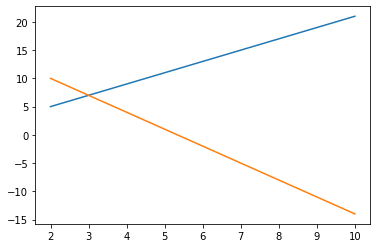

In [8]:
# przekształćmy równanie do postaci "funkcyjnej"
y = 2*x + 1
z = 16 - 3*x
#
# y = 
# y = 
plt.clf()
# nasze rozwiązanie jest w okolicach punktu (3,7)
x = np.linspace(2,10)
# wykres 1
plt.plot(x,y)
# wykres 2
plt.plot(x,z)

plt.show()

---
Przetestuj działanie funkcji ```np.hstack``` i ```np.vstack``` aby "skleić" ze sobą dwie wygenerowane na początku zajęć macierze

In [9]:
D=np.hstack([A,D])

D


matrix([[ 2, -1,  3],
        [ 3,  1,  7]])

---

Jedną z metod wyznaczania macierzy odwrotnej jest metoda eliminacji Gaussa-Jordana. Polega ona na tym, że do naszej macierzy A "doklejamy" macierz jednostkową I

[ A | I ]

Teraz, stosując dozwolone operacje 
- mnożenie wiersza przez stałą <> 0
- dodawanie do wiersza innego wiersza (przemnożonego przez stałą <> 0)
- zamianę wierszy miejscami

dążymy do tego, aby uzyskać macierz postaci [ I | B ]

Jeśli nam się to uda, to B będzie macierzą odwrotną do A.


In [10]:
# przykład:

A = np.matrix(
    [
        [ 5, 6 ],
        [ 4, 5 ]
    ]
)
print (A)

[[5 6]
 [4 5]]


In [11]:
I = np.eye(2)
print (I)

[[1. 0.]
 [0. 1.]]


In [12]:
M = np.hstack([A, I])
print (M)

[[5. 6. 1. 0.]
 [4. 5. 0. 1.]]


In [13]:
# odejmijmy od drugiego wiersza wiersz pierwszy przemnożony przez 4/5
M[1,:] -= 4/5*M[0,:]
print (M)

[[ 5.   6.   1.   0. ]
 [ 0.   0.2 -0.8  1. ]]


In [14]:
# od pierwszego wiersza odejmijmy wiersz drugi przemnożony przez 30
M[0,:] -= 30*M[1,:]
print (M)

[[ 5.00000000e+00  2.13162821e-14  2.50000000e+01 -3.00000000e+01]
 [ 0.00000000e+00  2.00000000e-01 -8.00000000e-01  1.00000000e+00]]


In [15]:
# podzielmy pierwszy wiersz przez 5 i drugi przez 0.2
M[0,:] /= 5
M[1,:] /= 0.2

print (M)

[[ 1.00000000e+00  4.26325641e-15  5.00000000e+00 -6.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00 -4.00000000e+00  5.00000000e+00]]


In [16]:
# czy to co jest po lewej stronie jest wystarczająco bliskie macierzy jednostkowej ?
print (M.round(2))

[[ 1.  0.  5. -6.]
 [ 0.  1. -4.  5.]]


In [17]:
# wyciągnijmy "prawą" stronę
B = M[:, 2:]

In [18]:
# i sprawdźmy, czy jest taki jak A^{-1}
print (B)
print (A**-1)

[[ 5. -6.]
 [-4.  5.]]
[[ 5. -6.]
 [-4.  5.]]


Stosując powyższą metodę - wyznacz macierz odwrotną do macierzy

$$
\begin{bmatrix}
1 & 2 & 3 \\
0 & 1 & 4 \\
5 & 6 & 0
\end{bmatrix}
$$


In [19]:
A=np.matrix(
    [
        [ 1, 2, 3 ],
        [ 0, 1, 4 ],
        [ 5, 6, 0 ]
    ]
)

In [20]:
I = np.eye(3)
print (I)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [21]:
M = np.hstack([A, I])
print (M)

[[1. 2. 3. 1. 0. 0.]
 [0. 1. 4. 0. 1. 0.]
 [5. 6. 0. 0. 0. 1.]]


In [22]:
M[2,:] -= 5*M[0,:]
print (M)

[[  1.   2.   3.   1.   0.   0.]
 [  0.   1.   4.   0.   1.   0.]
 [  0.  -4. -15.  -5.   0.   1.]]


In [23]:
M[2,:] += 4*M[1,:]
print (M)

[[ 1.  2.  3.  1.  0.  0.]
 [ 0.  1.  4.  0.  1.  0.]
 [ 0.  0.  1. -5.  4.  1.]]


In [24]:
M[0,:] -= 2*M[1,:]
M[1,:] -= 4*M[2,:]
M[0,:] += 5*M[2,:]

print (M)

[[  1.   0.   0. -24.  18.   5.]
 [  0.   1.   0.  20. -15.  -4.]
 [  0.   0.   1.  -5.   4.   1.]]


In [25]:
# sprawdzenie

In [26]:
G=np.matrix(
    [
        [ -24, 18, 5 ],
        [ 20, -15, -4 ],
        [ -5, 4, 1 ]
    ]
)
print(A*G)

[[1 0 0]
 [0 1 0]
 [0 0 1]]
